In [1]:
pip install yfinance==0.2.28


  Obtaining dependency information for yfinance==0.2.28 from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.3 kB ? eta -:--:--
   ---------------------------------------- 65.3/65.3 kB 3.4 MB/s eta 0:00:00


In [2]:
import csv

# Specify the file path
file_path = r'C:\Users\w2019695\Desktop\VOD\VOD.csv'

# Check if the file exists before trying to open it
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2021-01-04', '17.040001', '17.129999', '16.790001', '16.930000', '14.064069', '3698800']
['2021-01-05', '16.850000', '17.160000', '16.850000', '17.120001', '14.221908', '3058100']
['2021-01-06', '17.639999', '17.809999', '17.530001', '17.620001', '14.637265', '3868400']
['2021-01-07', '17.920000', '17.930000', '17.680000', '17.730000', '14.728644', '4455300']
['2021-01-08', '17.600000', '17.620001', '17.350000', '17.540001', '14.570809', '3651000']
['2021-01-11', '17.330000', '17.480000', '17.299999', '17.430000', '14.479429', '2628200']
['2021-01-12', '17.190001', '17.219999', '17.049999', '17.160000', '14.255134', '2882400']
['2021-01-13', '17.530001', '17.610001', '17.389999', '17.450001', '14.496042', '3072800']
['2021-01-14', '17.580000', '17.750000', '17.549999', '17.650000', '14.662187', '3250700']
['2021-01-15', '17.389999', '17.400000', '17.200001', '17.360001', '14.421279', '2713300']
['2021-01-19', '17.299999'

Matplotlib is building the font cache; this may take a moment.


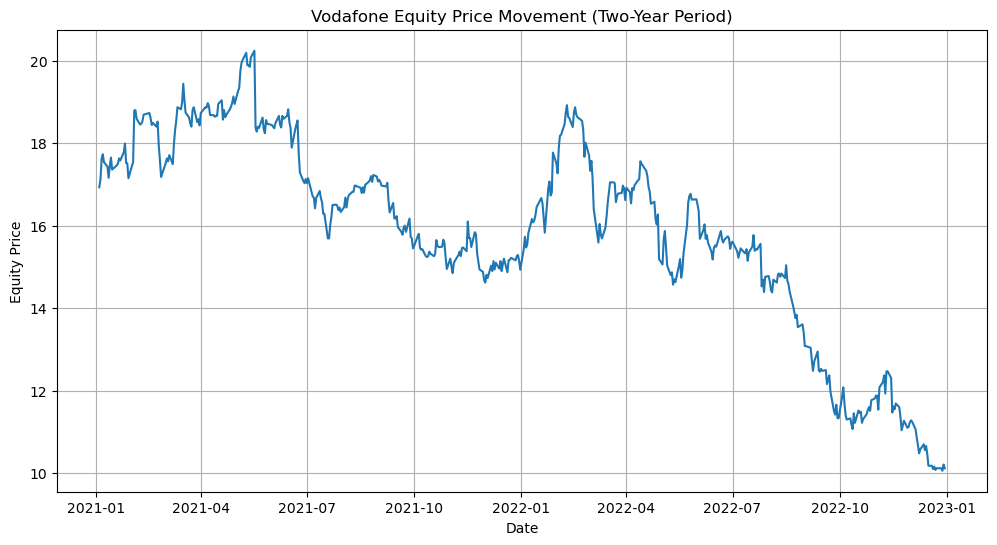

Annualized Average Return: -19.81%
Annualized Standard Deviation: 27.33%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = r'C:\Users\w2019695\Desktop\VOD\VOD.csv'

# Read the data into a DataFrame
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the equity price movement
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Vodafone Equity Price Movement (Two-Year Period)')
plt.xlabel('Date')
plt.ylabel('Equity Price')
plt.grid(True)
plt.show()

# Calculate the annualized average return
returns = data['Close'].pct_change()
annualized_return = ((1 + returns.mean())**252) - 1

# Calculate the annualized standard deviation
annualized_std = returns.std() * (252**0.5)

print(f"Annualized Average Return: {annualized_return:.2%}")
print(f"Annualized Standard Deviation: {annualized_std:.2%}")

C:\Users\w2019695\AppData\Local\Temp\ipykernel_6712\4204246878.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log Returns'] = np.log(filtered_df['Close'] / filtered_df['Close'].shift(1))


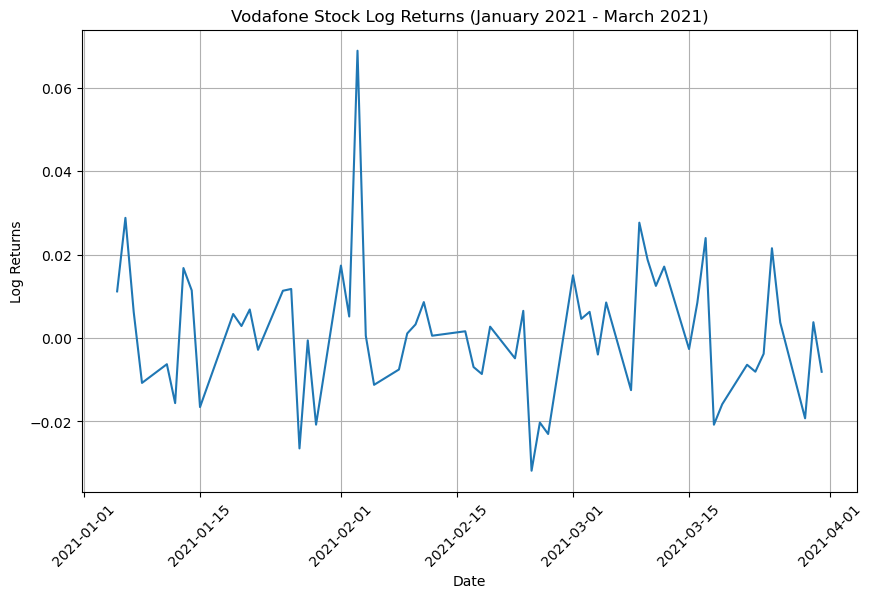

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the file path
file_path = r'C:\Users\w2019695\Desktop\VOD\VOD.csv'

# Check if the file exists before trying to open it
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
        
        # Create a pandas DataFrame from the CSV data
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Convert 'Close' column to float format
        df['Close'] = df['Close'].astype(float)
        
        # Filter data for the specified date range
        start_date = pd.to_datetime('2021-01-01')
        end_date = pd.to_datetime('2021-03-31')
        filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        
        # Calculate log returns
        filtered_df['Log Returns'] = np.log(filtered_df['Close'] / filtered_df['Close'].shift(1))
        
        # Plot figure
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Date'], filtered_df['Log Returns'])
        plt.xlabel('Date')
        plt.ylabel('Log Returns')
        plt.title('Vodafone Stock Log Returns (January 2021 - March 2021)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [6]:
import datetime

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 3, 31)

days_to_expiration = (end_date - start_date).days
t = days_to_expiration / 365

In [10]:
import csv
import numpy as np

# Specify the file path
file_path = r'C:\Users\w2019695\Desktop\VOD\VOD.csv'

# Initialize a list to store the closing prices
closing_prices = []

# Check if the file exists before trying to open it
try:
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            date = row[0]  # Assuming the date is in the first column
            if '01/01/2021' <= date <= '31/03/2021':
                closing_price = float(row[4])  # Assuming the closing price is in the 5th column
                closing_prices.append(closing_price)
            elif date > '31/03/2021':
                break
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Calculate the daily returns
returns = [(closing_prices[i] - closing_prices[i-1]) / closing_prices[i-1] * 100 for i in range(1, len(closing_prices))]

# Calculate the standard deviation of the daily returns
volatility = np.std(returns)

print("Volatility:", volatility)

Volatility: 1.7201069846270853


In [31]:
import math

def binomial_tree_option_pricing(S, K, r, sigma, T, n):
    # Calculate the parameters for the binomial tree
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    
    # Initialize the stock prices at each node of the tree
    stock_prices = [[0.0] * (i+1) for i in range(n+1)]
    stock_prices[0][0] = S
    
    # Calculate the stock prices at each node of the tree
    for i in range(1, n+1):
        for j in range(i+1):
            stock_prices[i][j] = S * (u ** (i-j)) * (d ** j)
    
    # Initialize the option prices at each node of the tree
    option_prices = [[0.0] * (i+1) for i in range(n+1)]
    
    # Calculate the option prices at each node of the tree
    for j in range(n+1):
        option_prices[n][j] = max(stock_prices[n][j] - K, 0)
    
    # Calculate the option prices at each node of the tree (backwards)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_prices[i][j] = math.exp(-r * dt) * (p * option_prices[i+1][j] + (1-p) * option_prices[i+1][j+1])
    
    # Return the option price at time 0
    return option_prices[0][0]

# Convert the date strings to datetime objects
dates = ['01/01/2021', '19/03/2021']
date_format = '%d/%m/%Y'
start_date = datetime.datetime.strptime(dates[0], date_format)
end_date = datetime.datetime.strptime(dates[1], date_format)

# Filter the data for the specified period
filtered_data = [row for row in data if start_date <= datetime.datetime.strptime(row[0], date_format) <= end_date]

# Extract the closing prices from the filtered data
closing_prices = [row[4] for row in filtered_data]

# Set the parameters for the option pricing
S = closing_prices[0]  # Initial stock price
K = 18.74  # Strike price (same as initial stock price)
r = 0.01  # Risk-free interest rate
sigma = 1.72  # Volatility of the stock
T = (end_date - start_date).days / 365  # Time to expiration in years
n = len(closing_prices) - 1  # Number of time steps

# Calculate the option price using the binomial tree method
option_price = binomial_tree_option_pricing(S, K, r, sigma, T, n)

print("Option Price:", option_price)

Option Price: 5.805095540741811


In [39]:
import numpy as np
import math

def calculate_option_price(S, K, r, T, sigma, n):
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize the stock prices at each node of the tree
    stock_prices = np.zeros((n+1, n+1))
    stock_prices[0, 0] = S

    # Calculate the stock prices at each node of the tree
    for i in range(1, n+1):
        for j in range(i+1):
            stock_prices[i, j] = S * (u ** j) * (d ** (i-j))

    # Initialize the option prices at each node of the tree
    option_prices = np.zeros((n+1, n+1))

    # Calculate the option prices at each node of the tree
    for j in range(n+1):
        option_prices[n, j] = max(stock_prices[n, j] - K, 0)

    # Calculate the option prices at each node of the tree (backwards)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_prices[i, j] = math.exp(-r * dt) * (p * option_prices[i+1, j] + (1-p) * option_prices[i+1, j+1])

    # Return the option price at time 0 and the entire option price array
    return option_prices[0, 0], option_prices

In [41]:
import datetime

S = 16.93
K = 18.74
r = 0.01
sigma = 1.72

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 3, 19)
T = (end_date - start_date).days / 365

n = int(T * 365)

option_price, option_prices_array = calculate_option_price(S, K, r, T, sigma, n)

print("Option Price at Time 0:", option_price)
print("Option Prices Array:", option_prices_array)

Option Price at Time 0: 15.49953160929095
Option Prices Array: [[1.54995316e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.29990909e+01 1.77869014e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.08131421e+01 1.49987389e+01 2.03375018e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.47062695e+04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.33309750e+04
  1.59646947e+04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.20841309e+04
  1.44718651e+04 1.73306674e+04]]


In [42]:
option_price, _ = calculate_option_price(S, K, r, T, sigma, n)

print("European Put Option Price at Time 0:", option_price)

European Put Option Price at Time 0: 15.49953160929095


In [43]:
import numpy as np
import datetime

S = 16.93
K = 18.74
r = 0.01
sigma = 1.72

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 3, 19)
T = (end_date - start_date).days / 365

n_simulations = 100000  # Number of Monte Carlo simulations

# Generate random numbers for stock price simulation
np.random.seed(42)  # Set random seed for reproducibility
z = np.random.standard_normal(n_simulations)

# Simulate stock price paths using geometric Brownian motion
stock_prices = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)

# Calculate payoffs
payoffs = np.maximum(K - stock_prices, 0)

# Discounted expected payoff is the option price
option_price = np.exp(-r * T) * np.mean(payoffs)

print("European Put Option Price:", option_price)

European Put Option Price: 6.396517676477346


In [44]:
import datetime
import numpy as np

# Binomial Tree Method
def calculate_option_price(S, K, r, T, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize the stock prices at each node of the tree
    stock_prices = np.zeros((n+1, n+1))
    stock_prices[0, 0] = S

    # Calculate the stock prices at each node of the tree
    for i in range(1, n+1):
        for j in range(i+1):
            stock_prices[i, j] = S * (u ** j) * (d ** (i-j))

    # Initialize the option prices at each node of the tree
    option_prices = np.zeros((n+1, n+1))

    # Calculate the option prices at each node of the tree
    for j in range(n+1):
        option_prices[n, j] = max(stock_prices[n, j] - K, 0)

    # Calculate the option prices at each node of the tree (backwards)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_prices[i, j] = np.exp(-r * dt) * (p * option_prices[i+1, j] + (1-p) * option_prices[i+1, j+1])

    # Return the option price at time 0 and the entire option price array
    return option_prices[0, 0]


# Define parameters
S = 16.93
K = 18.74
r = 0.01
sigma = 1.72

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 3, 19)
T = (end_date - start_date).days / 365

n = int(T * 365)  # Number of time steps for binomial tree method
n_simulations = 100000  # Number of simulations for Monte Carlo method

# Calculate European put option price using binomial tree method
option_price_binomial = calculate_option_price(S, K, r, T, sigma, n)

# Monte Carlo Simulation Method
np.random.seed(42)  # Set random seed for reproducibility
z = np.random.standard_normal(n_simulations)

stock_prices = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
payoffs = np.maximum(K - stock_prices, 0)
option_price_monte_carlo = np.exp(-r * T) * np.mean(payoffs)

# Compare results
print("European Put Option Price (Binomial Tree Method):", option_price_binomial)
print("European Put Option Price (Monte Carlo Simulation Method):", option_price_monte_carlo)

European Put Option Price (Binomial Tree Method): 15.49953160929095
European Put Option Price (Monte Carlo Simulation Method): 6.396517676477346


In [45]:
import numpy as np
import datetime

S = 16.93
K = 18.74
r = 0.01
sigma = 1.72

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 3, 19)
T = (end_date - start_date).days / 365

n_simulations = 100000  # Number of Monte Carlo simulations

# Generate random numbers for stock price simulation
np.random.seed(42)  # Set random seed for reproducibility
z = np.random.standard_normal(n_simulations)

# Simulate stock price paths using geometric Brownian motion
stock_prices = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)

# Calculate payoffs
payoffs = np.maximum(stock_prices - K, 0)

# Discounted expected payoff is the option price
option_price = np.exp(-r * T) * np.mean(payoffs)

print("European Call Option Price:", option_price)

European Call Option Price: 4.642640618988529


In [46]:
import numpy as np

# Binomial Tree Method
def calculate_option_price(S, K, r, T, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize the stock prices at each node of the tree
    stock_prices = np.zeros((n+1, n+1))
    stock_prices[0, 0] = S

    # Calculate the stock prices at each node of the tree
    for i in range(1, n+1):
        for j in range(i+1):
            stock_prices[i, j] = S * (u ** j) * (d ** (i-j))

    # Initialize the option prices at each node of the tree
    option_prices = np.zeros((n+1, n+1))

    # Calculate the option prices at each node of the tree
    for j in range(n+1):
        option_prices[n, j] = max(stock_prices[n, j] - K, 0)

    # Calculate the option prices at each node of the tree (backwards)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_prices[i, j] = np.exp(-r * dt) * (p * option_prices[i+1, j] + (1-p) * option_prices[i+1, j+1])

    # Return the option price at time 0 and the entire option price array
    return option_prices[0, 0]


# Define parameters
S = 16.93
K = 18.74
r = 0.01
sigma = 1.72

T = 77/365  # Time period in years
n = 100  # Number of time steps for binomial tree method

# Calculate European call option price using binomial tree method
option_price = calculate_option_price(S, K, r, T, sigma, n)

print("European Call Option Price (Binomial Tree Method):", option_price)

European Call Option Price (Binomial Tree Method): 15.53623305314562


In [50]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93
K = 18.74
r = 0.01
sigma = 1.72
T = 77/365

# Calculate d1 using the Black-Scholes formula
d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta using the cumulative distribution function of the standard normal distribution
delta = norm.cdf(d1)

print("Delta:", delta)

Delta: 0.6060725532534033


In [54]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate European call option price using the Black-Scholes-Merton formula
call_option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Calculate European put option price using the put-call parity relationship
put_option_price = call_option_price - S + K * np.exp(-r * T)

print("European Call Option Price (Black-Scholes-Merton Method):", call_option_price)
print("European Put Option Price (Black-Scholes-Merton Method):", put_option_price)

European Call Option Price (Black-Scholes-Merton Method): 4.6278963438834575
European Put Option Price (Black-Scholes-Merton Method): 6.398404315874231


In [57]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = call_delta - 1

print("Call Delta:", call_delta)
print("Put Delta:", put_delta)

Call Delta: 0.6060725532534033
Put Delta: -0.39392744674659674


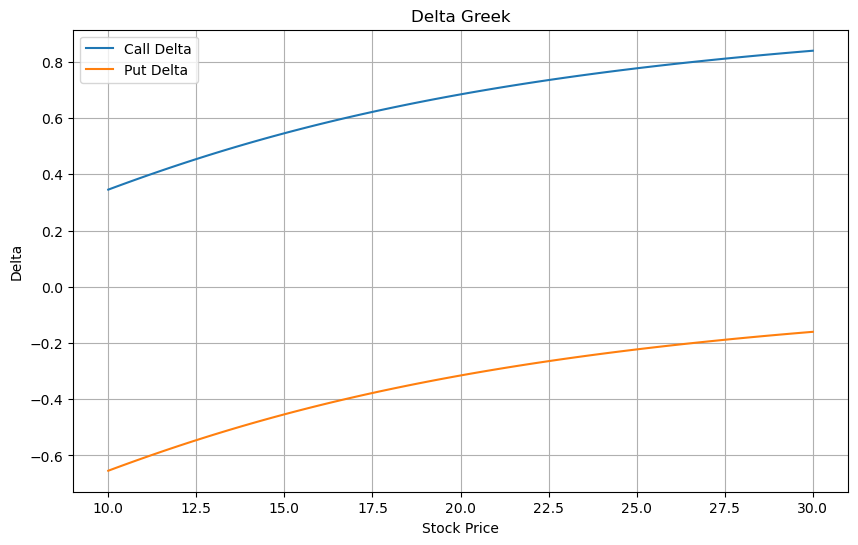

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate delta for a call option
call_delta = norm.cdf(d1)

# Calculate delta for a put option
put_delta = call_delta - 1

# Plot the delta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_delta, label='Call Delta')
plt.plot(S_range, put_delta, label='Put Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta Greek')
plt.legend()
plt.grid(True)
plt.show()

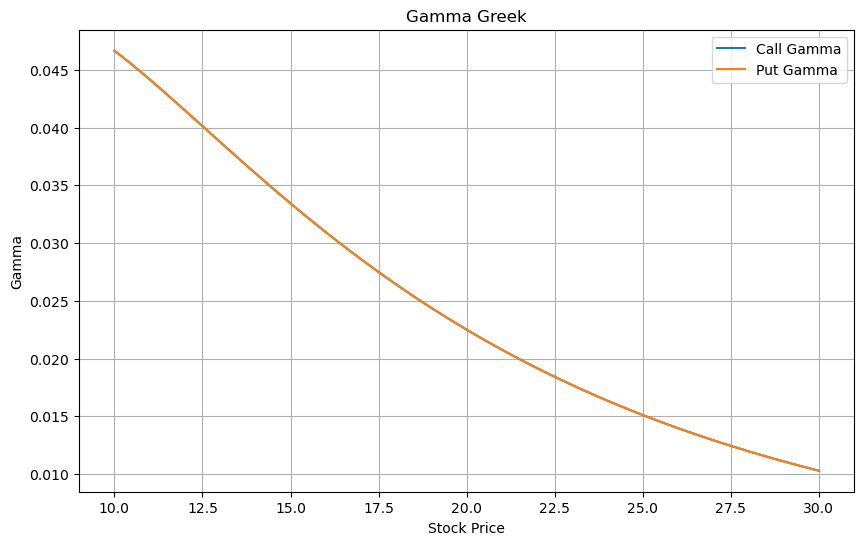

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate gamma for a call option
call_gamma = norm.pdf(d1) / (S_range * sigma * np.sqrt(T))

# Calculate gamma for a put option
put_gamma = call_gamma

# Plot the gamma values
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_gamma, label='Call Gamma')
plt.plot(S_range, put_gamma, label='Put Gamma')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma Greek')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma = (norm.pdf(d1)) / (S * sigma * np.sqrt(T))

print("Gamma:", gamma)

Gamma: 0.028767451048643984


In [63]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma_call = (norm.pdf(d1)) / (S * sigma * np.sqrt(T))

# Calculate gamma for a put option
gamma_put = gamma_call

print("Gamma for Call Option:", gamma_call)
print("Gamma for Put Option:", gamma_put)

Gamma for Call Option: 0.028767451048643984
Gamma for Put Option: 0.028767451048643984


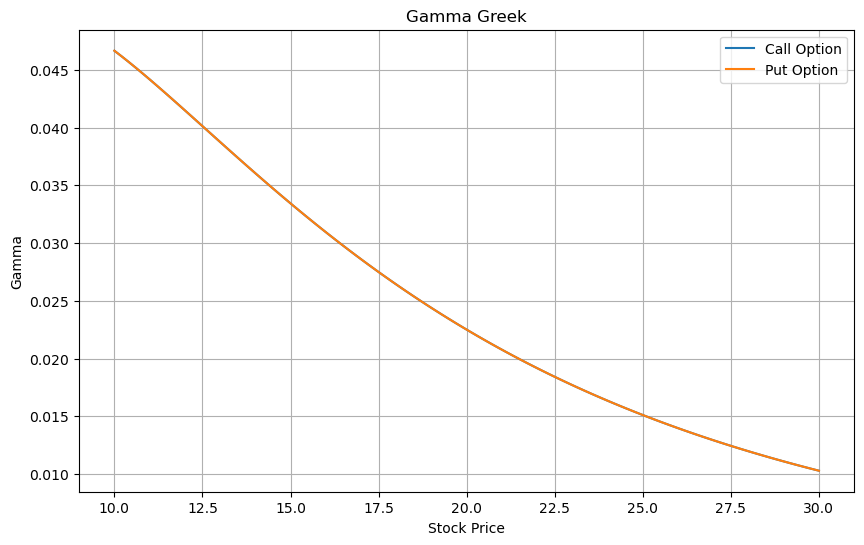

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculate gamma for a call option
gamma_call = norm.pdf(d1) / (S_range * sigma * np.sqrt(T))

# Calculate gamma for a put option
gamma_put = gamma_call

# Plot the gamma values
plt.figure(figsize=(10, 6))
plt.plot(S_range, gamma_call, label='Call Option')
plt.plot(S_range, gamma_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma Greek')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

print("Theta for Call Option:", theta_call)
print("Theta for Put Option:", theta_put)

Theta for Call Option: -12.253025060110174
Theta for Put Option: -12.066019980390267


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

# Plot the theta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, theta_call, label='Call Option')
plt.plot(S_range, theta_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.title('Theta Greek')
plt.legend()
plt.grid(True)
plt.show()

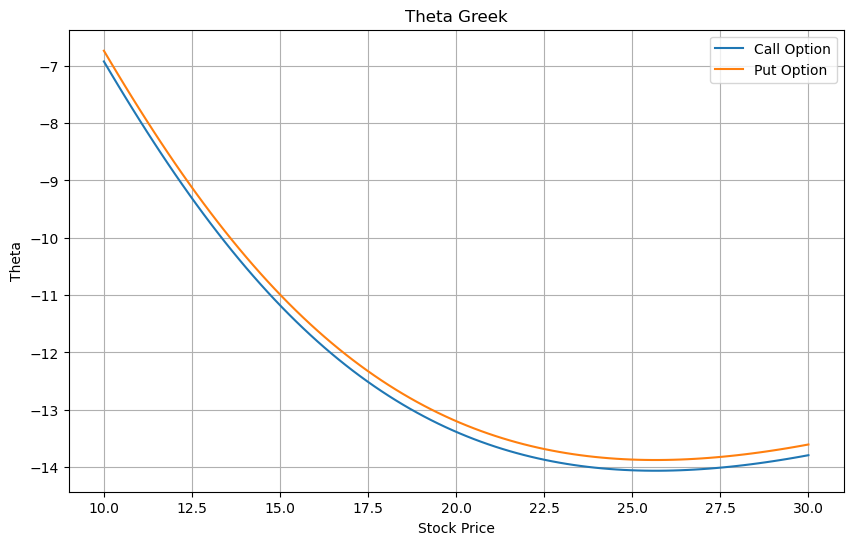

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices
n_points = 100  # Number of points on the x-axis
S_range = np.linspace(S_min, S_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_range / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate theta for a call option
theta_call = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_range * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

# Plot the theta values
plt.figure(figsize=(10, 6))
plt.plot(S_range, theta_call, label='Call Option')
plt.plot(S_range, theta_put, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.title('Theta Greek')
plt.legend()
plt.grid(True)
plt.show()

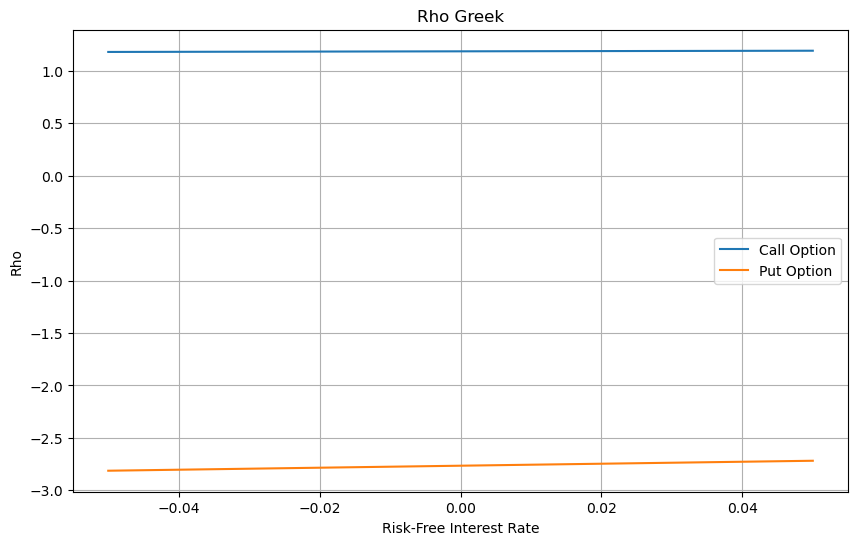

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r_min = -0.05  # Minimum risk-free interest rate
r_max = 0.05  # Maximum risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of risk-free interest rates
n_points = 100  # Number of points on the x-axis
r_range = np.linspace(r_min, r_max, n_points)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r_range + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r_range * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r_range * T) * norm.cdf(-d2)

# Plot the rho values
plt.figure(figsize=(10, 6))
plt.plot(r_range, rho_call, label='Call Option')
plt.plot(r_range, rho_put, label='Put Option')
plt.xlabel('Risk-Free Interest Rate')
plt.ylabel('Rho')
plt.title('Rho Greek')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 16.93  # Stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r * T) * norm.cdf(-d2)

print("Rho for Call Option:", rho_call)
print("Rho for Put Option:", rho_put)

Rho for Call Option: 1.1883129388154596
Rho for Put Option: -2.7567257292483474


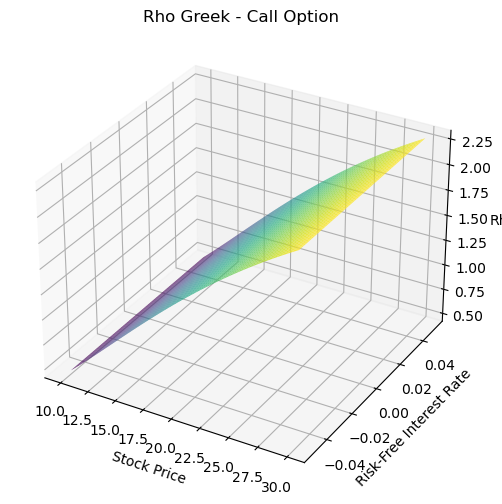

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r_min = -0.05  # Minimum risk-free interest rate
r_max = 0.05  # Maximum risk-free interest rate
T = 77/365  # Time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices and risk-free interest rates
n_points = 100  # Number of points on each axis
S_range = np.linspace(S_min, S_max, n_points)
r_range = np.linspace(r_min, r_max, n_points)

# Create a meshgrid of stock prices and risk-free interest rates
S_mesh, r_mesh = np.meshgrid(S_range, r_range)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_mesh / K) + (r_mesh + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate rho for a call option
rho_call = K * T * np.exp(-r_mesh * T) * norm.cdf(d2)

# Calculate rho for a put option
rho_put = -K * T * np.exp(-r_mesh * T) * norm.cdf(-d2)

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the rho values for the call option
ax.plot_surface(S_mesh, r_mesh, rho_call, cmap='viridis', alpha=0.8)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Risk-Free Interest Rate')
ax.set_zlabel('Rho')
ax.set_title('Rho Greek - Call Option')

plt.show()

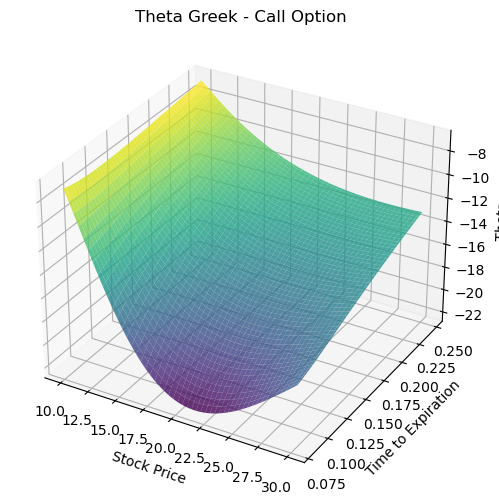

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Define parameters
S_min = 10  # Minimum stock price
S_max = 30  # Maximum stock price
K = 18.74  # Strike price
r = 0.01  # Risk-free interest rate
T_min = 30/365  # Minimum time to expiration in years
T_max = 90/365  # Maximum time to expiration in years
sigma = 1.72  # Volatility

# Generate a range of stock prices, time to expiration, and risk-free interest rates
n_points = 100  # Number of points on each axis
S_range = np.linspace(S_min, S_max, n_points)
T_range = np.linspace(T_min, T_max, n_points)

# Create a meshgrid of stock prices, time to expiration, and risk-free interest rates
S_mesh, T_mesh = np.meshgrid(S_range, T_range)

# Calculate d1 and d2 using the Black-Scholes-Merton formula
d1 = (np.log(S_mesh / K) + (r + 0.5 * sigma**2) * T_mesh) / (sigma * np.sqrt(T_mesh))
d2 = d1 - sigma * np.sqrt(T_mesh)

# Calculate theta for a call option
theta_call = (-S_mesh * norm.pdf(d1) * sigma) / (2 * np.sqrt(T_mesh)) - r * K * np.exp(-r * T_mesh) * norm.cdf(d2)

# Calculate theta for a put option
theta_put = (-S_mesh * norm.pdf(d1) * sigma) / (2 * np.sqrt(T_mesh)) + r * K * np.exp(-r * T_mesh) * norm.cdf(-d2)

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the theta values for the call option
ax.plot_surface(S_mesh, T_mesh, theta_call, cmap='viridis', alpha=0.8)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('Theta')
ax.set_title('Theta Greek - Call Option')

plt.show()